### Read
test the quality of wine depending on the data given below and classify them in to groups

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
wine=pd.read_csv(r'winequality-red.csv')

In [3]:
data=pd.DataFrame(wine)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

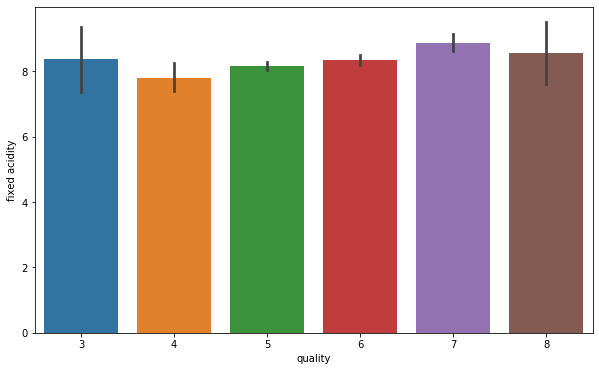

In [8]:
# fixed acidity does not give any specification to classify the quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

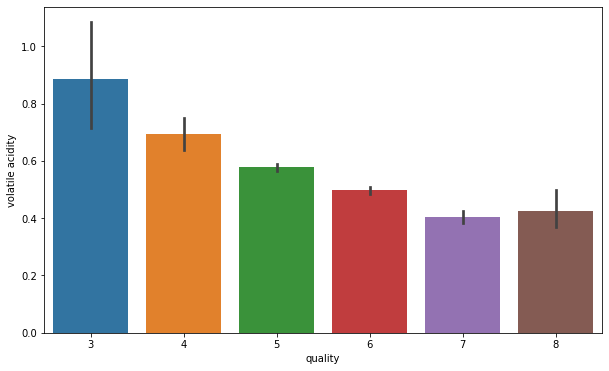

In [9]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

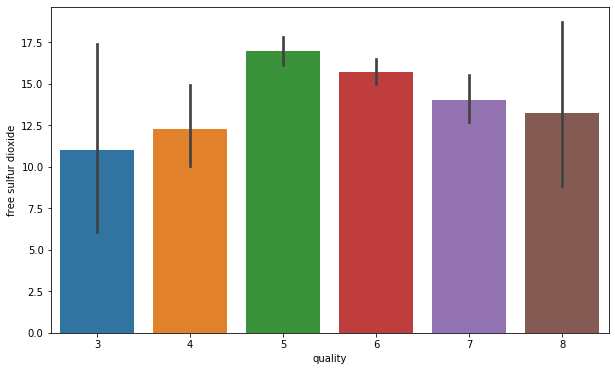

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

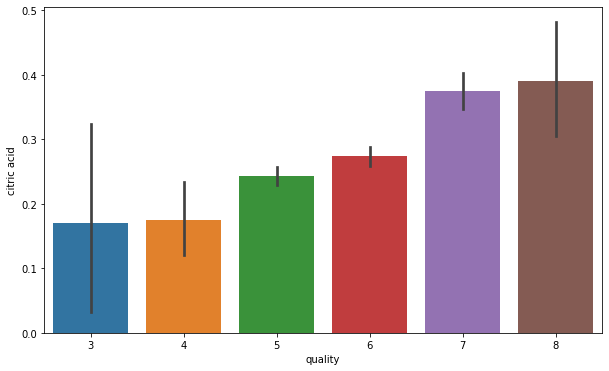

In [11]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

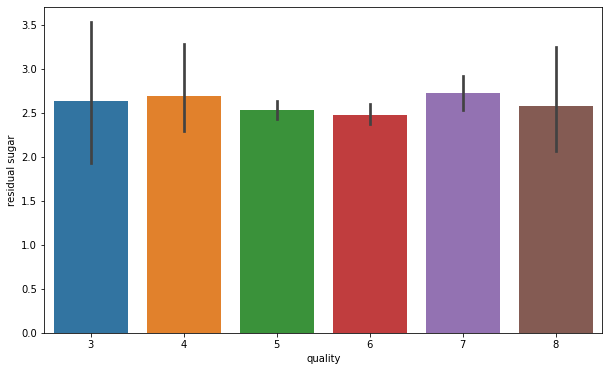

In [12]:
# residual sugar does not give any specification to classify the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

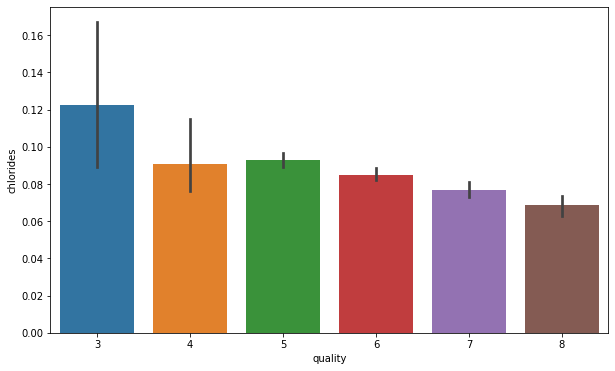

In [13]:
#Composition of chloride decreses as quality of the wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

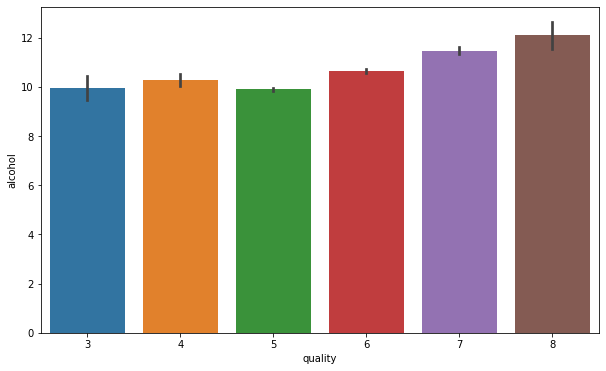

In [14]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

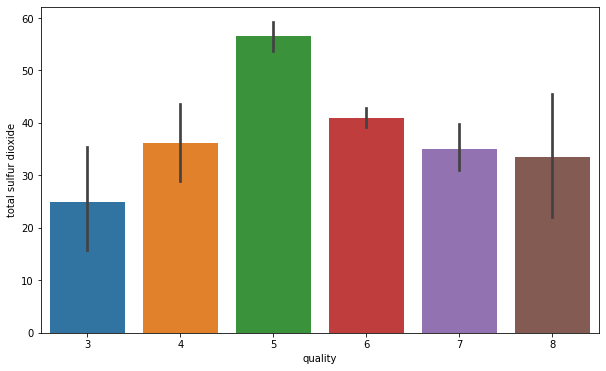

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

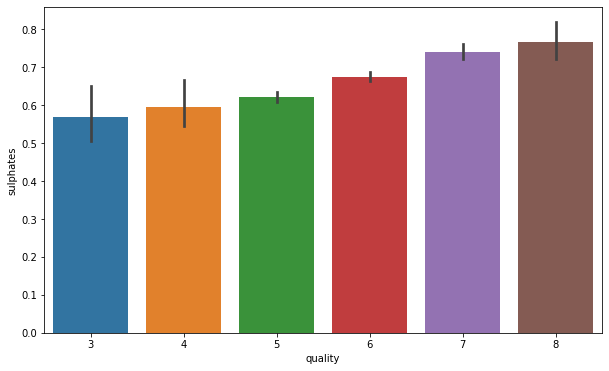

In [16]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

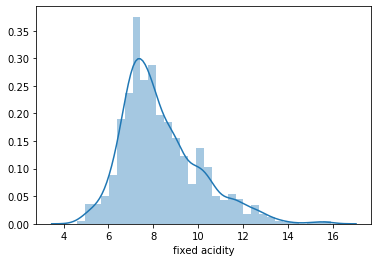

In [17]:
sns.distplot(data['fixed acidity'])

In [18]:
abs(data.skew())
data['fixed acidity'] = np.log(data['fixed acidity'])

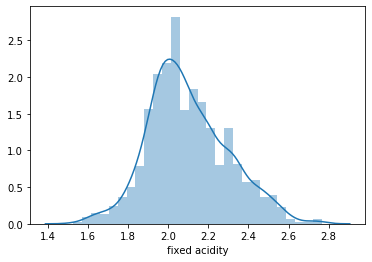

In [19]:
sns.distplot(data['fixed acidity'])

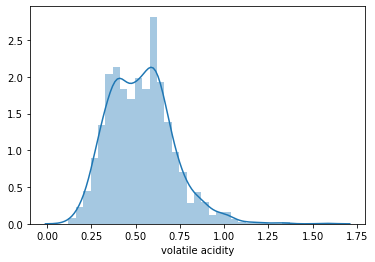

In [20]:
sns.distplot(data['volatile acidity'])

In [21]:
abs(data.skew())
data['volatile acidity'] = np.log(data['volatile acidity'])

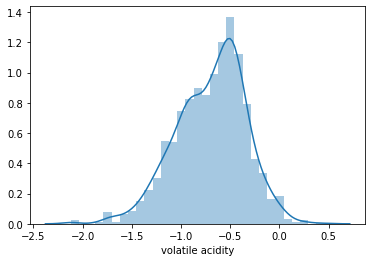

In [22]:
sns.distplot(data['volatile acidity'])

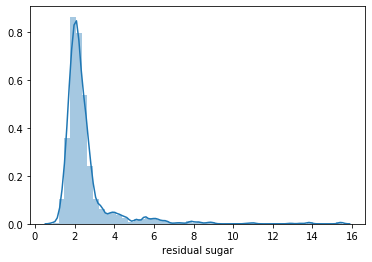

In [23]:
sns.distplot(data['residual sugar'])

In [24]:
abs(data.skew())
data['residual sugar'] = np.log(data['residual sugar'])

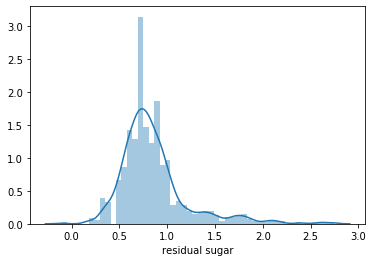

In [25]:
sns.distplot(data['residual sugar'])

In [26]:
abs(data.skew())
data['chlorides'] = np.log(data['chlorides'])

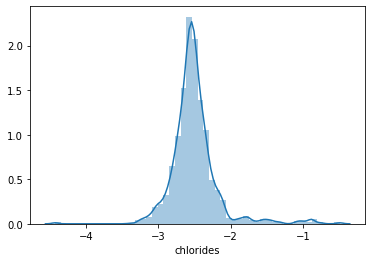

In [27]:
sns.distplot(data['chlorides'])

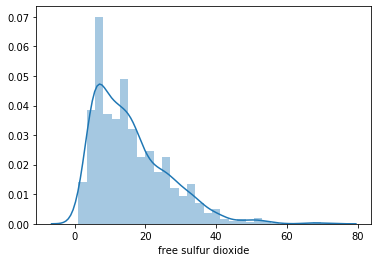

In [28]:
sns.distplot(data['free sulfur dioxide'])

In [29]:
abs(data.skew())
data['free sulfur dioxide'] = np.log(data['free sulfur dioxide'])

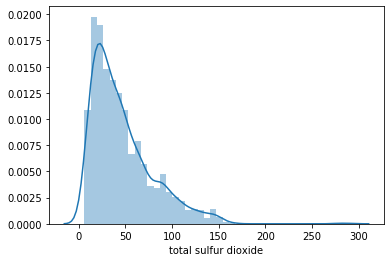

In [30]:
sns.distplot(data['total sulfur dioxide'])

In [31]:
abs(data.skew())
data['total sulfur dioxide'] = np.log(data['total sulfur dioxide'])

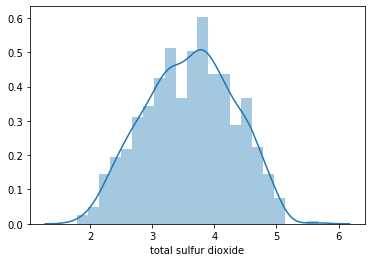

In [32]:
sns.distplot(data['total sulfur dioxide'])

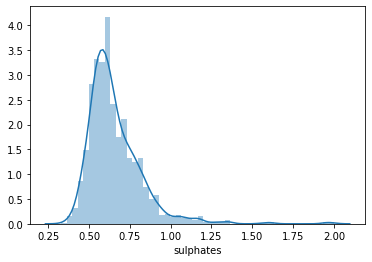

In [33]:
sns.distplot(data['sulphates'])

In [34]:
abs(data.skew())
data['sulphates'] = np.log(data['sulphates'])

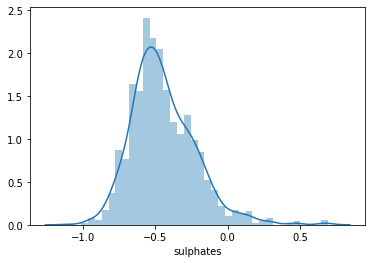

In [35]:
sns.distplot(data['sulphates'])

In [36]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.0,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,5
1,2.054124,-0.127833,0.0,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,5


In [38]:
X=data.drop(['quality'],axis=1)
y=data['quality']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [40]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [41]:
model=LogisticRegression()

In [42]:
model.fit(X_train,y_train)

C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred=model.predict(X_test)

In [44]:
metrics.accuracy_score(y_test, y_pred)

0.634375

In [45]:
# create decision tree classifier object
clf=DecisionTreeClassifier()

#train decision tree classfire
clf=clf.fit(X_train,y_train)

# predict the responce for test data
y_pred=clf.predict(X_test)

# model accuracy, how often is classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.65


In [50]:
from sklearn.svm import SVC
clf_svm=SVC(C=5)
clf_svm.fit(X_train,y_train)
y_pred=clf_svm.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.671875


In [47]:

clf_random_forest=RandomForestClassifier(n_estimators=210)
clf_random_forest.fit(X_train,y_train)
y_pred=clf_random_forest.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7375


In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.84      0.82      0.83       152
           6       0.63      0.81      0.71       115
           7       0.81      0.42      0.56        40
           8       1.00      0.17      0.29         6

    accuracy                           0.74       320
   macro avg       0.55      0.37      0.40       320
weighted avg       0.74      0.74      0.72       320



C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
